<a href="https://colab.research.google.com/github/irinap9270/hg_ml/blob/main/Ch9-3.%20LSTM%26GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 신경망 훈련

In [1]:
# IMDB 리뷰 데이터 사용
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

17464789/17464789 [==============================] - 0s 0us/step


Epoch 1/20
313/313 [==============================] - 12s 31ms/step - loss: 0.6918 - accuracy: 0.5465 - val_loss: 0.6901 - val_accuracy: 0.6050
Epoch 2/20
313/313 [==============================] - 8s 27ms/step - loss: 0.6860 - accuracy: 0.6399 - val_loss: 0.6793 - val_accuracy: 0.6682
Epoch 3/20
313/313 [==============================] - 6s 20ms/step - loss: 0.6498 - accuracy: 0.7021 - val_loss: 0.6219 - val_accuracy: 0.6826
Epoch 4/20
313/313 [==============================] - 6s 21ms/step - loss: 0.5964 - accuracy: 0.7123 - val_loss: 0.5874 - val_accuracy: 0.7140
Epoch 5/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5706 - accuracy: 0.7326 - val_loss: 0.5680 - val_accuracy: 0.7328
Epoch 6/20
313/313 [==============================] - 6s 21ms/step - loss: 0.5495 - accuracy: 0.7486 - val_loss: 0.5464 - val_accuracy: 0.7476
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.5302 - accuracy: 0.7614 - val_loss: 0.5305 - val_accuracy: 0.751

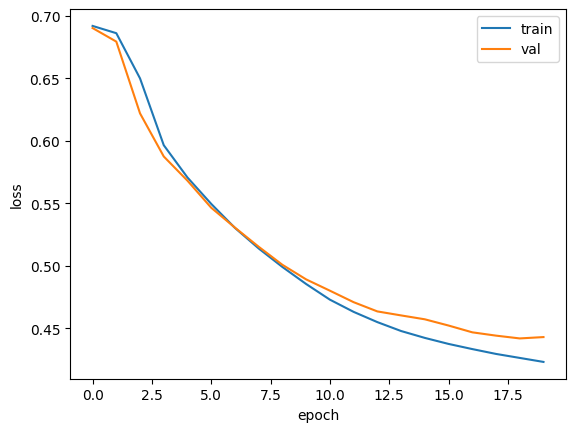

In [5]:
# LSTM 순환층 생성
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

# 모델 컴파일, 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=20, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

# 훈련 손실, 검증 손실 그래프 출력
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# Dropout 적용

Epoch 1/20
313/313 [==============================] - 12s 28ms/step - loss: 0.6923 - accuracy: 0.5363 - val_loss: 0.6917 - val_accuracy: 0.5746
Epoch 2/20
313/313 [==============================] - 7s 22ms/step - loss: 0.6901 - accuracy: 0.5888 - val_loss: 0.6885 - val_accuracy: 0.6308
Epoch 3/20
313/313 [==============================] - 6s 18ms/step - loss: 0.6841 - accuracy: 0.6433 - val_loss: 0.6777 - val_accuracy: 0.6798
Epoch 4/20
313/313 [==============================] - 7s 22ms/step - loss: 0.6509 - accuracy: 0.6896 - val_loss: 0.6152 - val_accuracy: 0.6998
Epoch 5/20
313/313 [==============================] - 6s 20ms/step - loss: 0.6020 - accuracy: 0.7014 - val_loss: 0.5903 - val_accuracy: 0.7056
Epoch 6/20
313/313 [==============================] - 7s 21ms/step - loss: 0.5775 - accuracy: 0.7197 - val_loss: 0.5675 - val_accuracy: 0.7318
Epoch 7/20
313/313 [==============================] - 5s 17ms/step - loss: 0.5580 - accuracy: 0.7355 - val_loss: 0.5470 - val_accuracy: 0.754

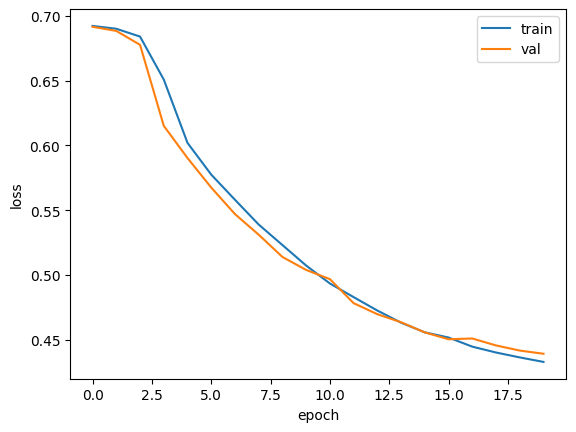

In [6]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=20, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 2개의 층 연결

Epoch 1/20
313/313 [==============================] - 19s 48ms/step - loss: 0.6931 - accuracy: 0.5071 - val_loss: 0.6932 - val_accuracy: 0.4910
Epoch 2/20
313/313 [==============================] - 11s 35ms/step - loss: 0.6929 - accuracy: 0.5243 - val_loss: 0.6929 - val_accuracy: 0.5080
Epoch 3/20
313/313 [==============================] - 11s 35ms/step - loss: 0.6924 - accuracy: 0.5547 - val_loss: 0.6922 - val_accuracy: 0.5696
Epoch 4/20
313/313 [==============================] - 11s 34ms/step - loss: 0.6906 - accuracy: 0.5954 - val_loss: 0.6880 - val_accuracy: 0.6386
Epoch 5/20
313/313 [==============================] - 12s 39ms/step - loss: 0.6759 - accuracy: 0.6523 - val_loss: 0.6508 - val_accuracy: 0.6828
Epoch 6/20
313/313 [==============================] - 10s 33ms/step - loss: 0.6298 - accuracy: 0.6824 - val_loss: 0.6089 - val_accuracy: 0.7002
Epoch 7/20
313/313 [==============================] - 14s 46ms/step - loss: 0.5957 - accuracy: 0.7096 - val_loss: 0.5767 - val_accuracy:

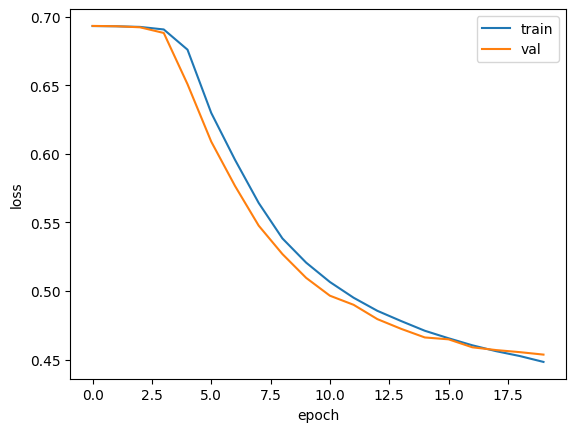

In [7]:
# 모든 타임스텝의 은닉 상태를 출력
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=20, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# GRU 신경망 훈련

Epoch 1/20
313/313 [==============================] - 11s 27ms/step - loss: 0.6918 - accuracy: 0.5426 - val_loss: 0.6911 - val_accuracy: 0.5542
Epoch 2/20
313/313 [==============================] - 9s 29ms/step - loss: 0.6895 - accuracy: 0.5772 - val_loss: 0.6886 - val_accuracy: 0.5712
Epoch 3/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6860 - accuracy: 0.5946 - val_loss: 0.6848 - val_accuracy: 0.5802
Epoch 4/20
313/313 [==============================] - 5s 17ms/step - loss: 0.6808 - accuracy: 0.6085 - val_loss: 0.6791 - val_accuracy: 0.5946
Epoch 5/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6728 - accuracy: 0.6224 - val_loss: 0.6700 - val_accuracy: 0.6074
Epoch 6/20
313/313 [==============================] - 6s 18ms/step - loss: 0.6605 - accuracy: 0.6376 - val_loss: 0.6564 - val_accuracy: 0.6184
Epoch 7/20
313/313 [==============================] - 6s 19ms/step - loss: 0.6415 - accuracy: 0.6565 - val_loss: 0.6340 - val_accuracy: 0.648

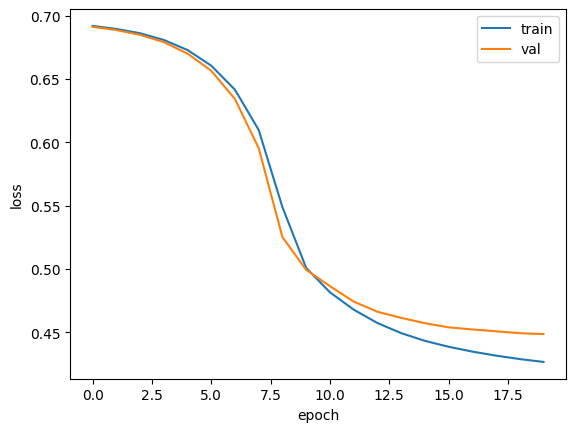

In [8]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=20, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

# 테스트 세트에 대한 성능 확인

In [9]:
# 2개의 층을 가진 가장 좋은 모델 불러오기
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 6s 7ms/step - loss: 0.4503 - accuracy: 0.7919


[0.4503273367881775, 0.7918800115585327]